In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [2]:
train = pd.read_csv('cars_train.csv',sep=';', encoding='latin1')

In [3]:
test = pd.read_csv('cars_test.csv',encoding='latin1',sep=';')

In [4]:
train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,"3,00716E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,7.473.259.008.373.930
1,"2,7964E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8.196.533.263.377.470
2,"5,64145E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.282.481.447.192
3,"5,68625E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,12.368.135.885.695.500
4,"3,38981E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,824.197.638.908.304


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [6]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,10.323834,3.487334,8.0,8.0,8.0,14.0,21.0
ano_de_fabricacao,29584.0,2016.758552,4.062422,1985.0,2015.0,2018.0,2019.0,2022.0
ano_modelo,29584.0,2017.808985,2.673930,1997.0,2016.0,2018.0,2020.0,2023.0
hodometro,29584.0,58430.592077,32561.769309,100.0,31214.0,57434.0,81953.5,390065.0
num_portas,29584.0,3.940677,0.338360,2.0,4.0,4.0,4.0,4.0
veiculo_alienado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.isna().sum().sort_values(ascending=False)[0:10]

veiculo_alienado           29584
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
revisoes_concessionaria    20412
veiculo_único_dono         19161
veiculo_licenciado         13678
ipva_pago                   9925
dono_aceita_troca           7662
num_fotos                    177
id                             0
dtype: int64

In [8]:
train.garantia_de_fábrica.value_counts()

Garantia de fábrica    4365
Name: garantia_de_fábrica, dtype: int64

In [9]:
train.garantia_de_fábrica = train.garantia_de_fábrica.replace('Garantia de fábrica',1)
train.garantia_de_fábrica = train.garantia_de_fábrica.fillna(0)

In [10]:
for i in range(0,29584):
    preco = train.preco[i].replace('.','')
    train.preco[i] = preco

C:\Users\felip\AppData\Local\Temp\ipykernel_5016\2808840279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.preco[i] = preco


In [11]:
train.preco = train.preco.astype(float)

## Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?


In [12]:
train.marca.value_counts()

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

In [13]:
marca_popular = ['VOLKSWAGEN','CHEVROLET','TOYOTA','HYUNDAI','FIAT','PEUGEOT','HONDA','FORD','RENAULT','NISSAN','CITROEN']

In [14]:
for i in range(0,11):
    marca = marca_popular[i]
    train_mask = train.marca==marca
    train['marca'][train_mask] = 1

C:\Users\felip\AppData\Local\Temp\ipykernel_5016\4272265483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['marca'][train_mask] = 1


In [15]:
marca_nao_popular = train.marca.value_counts().index[1:]
for i in range(0,30):
    marca = marca_nao_popular[i]
    train_mask = train.marca==marca
    train['marca'][train_mask] = 0

C:\Users\felip\AppData\Local\Temp\ipykernel_5016\3932462226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['marca'][train_mask] = 0


In [16]:
train.rename({"marca": "marca_popular"}, axis=1, inplace=True)

In [17]:
num_carros_garantia = train[['garantia_de_fábrica','preco','estado_vendedor']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica' ,ascending=False)
num_carros_garantia

,garantia_de_fábrica,preco
estado_vendedor,,
São Paulo (SP),2307.0,1.640546e+20
Rio de Janeiro (RJ),412.0,2.503207e+19
Paraná (PR),389.0,2.624164e+19
Santa Catarina (SC),330.0,2.287032e+19
Rio Grande do Sul (RS),281.0,1.714449e+19
Minas Gerais (MG),264.0,1.734564e+19
Goiás (GO),186.0,7.577309e+18
Alagoas (AL),58.0,1.160240e+18
Bahia (BA),51.0,6.309727e+18


## Aqui levando em conta o número de carros cadastrados na base com garantia, definimos SP como o grande vencedor, mas vamos fazer uma análise mais a fundo, visto que o preço somatório dos carros também está muito a cima, indicando que SP tem preços elevados e/ou tem uma maior quantidade de carros que os demais estados

In [18]:
selecao_estados = num_carros_garantia.index[0:6]

Vamos selecionar os estados que mais têm carros com garantia de fábrica para levar outros fatores em consideração

In [19]:
def listaFiltro(dataframe,nome, valores):
    return dataframe.loc[dataframe[nome].isin(valores)]
lista = selecao_estados.values
dfteste = listaFiltro(train,'estado_vendedor' ,lista)

In [20]:
dfteste[['estado_vendedor','garantia_de_fábrica','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False)

,garantia_de_fábrica,preco
estado_vendedor,,
Rio Grande do Sul (RS),0.170717,1.041585e+16
Paraná (PR),0.153998,1.038861e+16
São Paulo (SP),0.140860,1.001677e+16
Santa Catarina (SC),0.143354,9.934976e+15
Rio de Janeiro (RJ),0.161695,9.824204e+15
Minas Gerais (MG),0.148732,9.772193e+15


## Aqui podemos tirar alguns insights importantes, RS é o estado com a média de preço de venda mais alta, e como estamos procurando o melhor estado para vender um carro popular, isso tem grande peso, mas os 3 primeiros estados estão bem próximos, e identificamos SP novamente em mais uma condição favorável, a média de carros com garantia em SP também é considerável em relação aos demais, mesmo não sendo o maior, SP apresenta uma quantidade maior de veículos o que também influencia nessa média, sendo assim concluímos que:

# SP é nosso vencedor, para se vender um carro de marca popular, pois alcancaremos um preço de mercado bom, e também tem aceitação das pessoas em pagar um valor um pouco mais alto em carros que tenham garantia de fábrica

## Agora vamos responder o próximo problema de negócio

# Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [21]:
train.cambio.value_counts()[0:10]

Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: cambio, dtype: int64

In [22]:
picape_automatica = train[(train.tipo == 'Picape')& (train.cambio == 'Automática')] [['estado_vendedor','tipo']].groupby('estado_vendedor').count().sort_values('tipo',ascending=False)
picape_automatica

,tipo
estado_vendedor,
São Paulo (SP),1712
Paraná (PR),348
Rio de Janeiro (RJ),318
Santa Catarina (SC),283
Minas Gerais (MG),211
Rio Grande do Sul (RS),198
Goiás (GO),102
Bahia (BA),68
Pernambuco (PE),14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


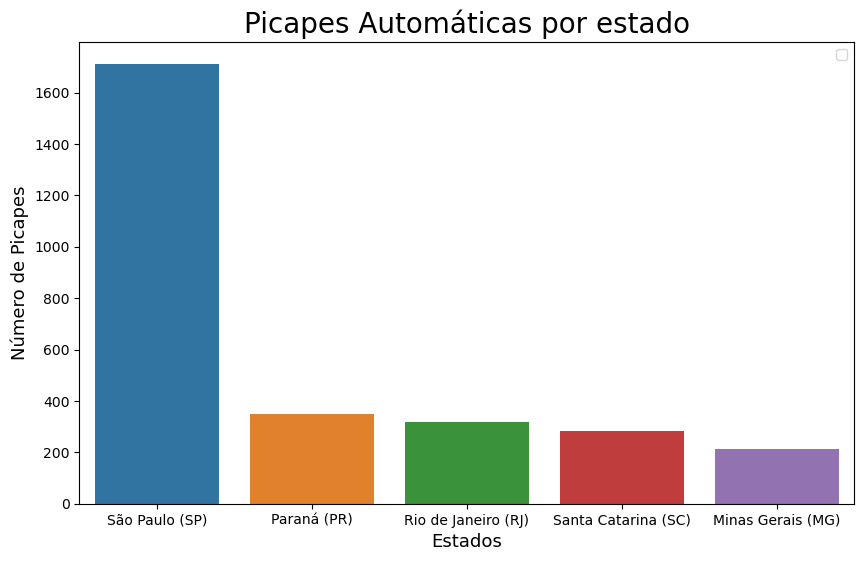

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x= picape_automatica[0:5].reset_index()['estado_vendedor'] , y= picape_automatica[0:5].reset_index()['tipo'])
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Número de Picapes', fontsize=13)
plt.title('Picapes Automáticas por estado', fontsize=20)
plt.legend(fontsize=10)
plt.show()

## Como primeiro filtro selecionamos os estados que mais apresentam picapes automáticas para fazer nossa análise

In [24]:
picape_automatica = train[(train.tipo == 'Picape')& (train.cambio == 'Automática')] [['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco').reset_index()

In [25]:
lista = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Minas Gerais (MG)']
picape_automatica_ = listaFiltro(picape_automatica,'estado_vendedor' ,lista)

In [26]:
picape_automatica_.sort_values('preco')

,estado_vendedor,preco
5,Minas Gerais (MG),9.823477e+15
6,Paraná (PR),1.029761e+16
9,Santa Catarina (SC),1.056219e+16
10,Rio de Janeiro (RJ),1.069470e+16
12,São Paulo (SP),1.096151e+16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


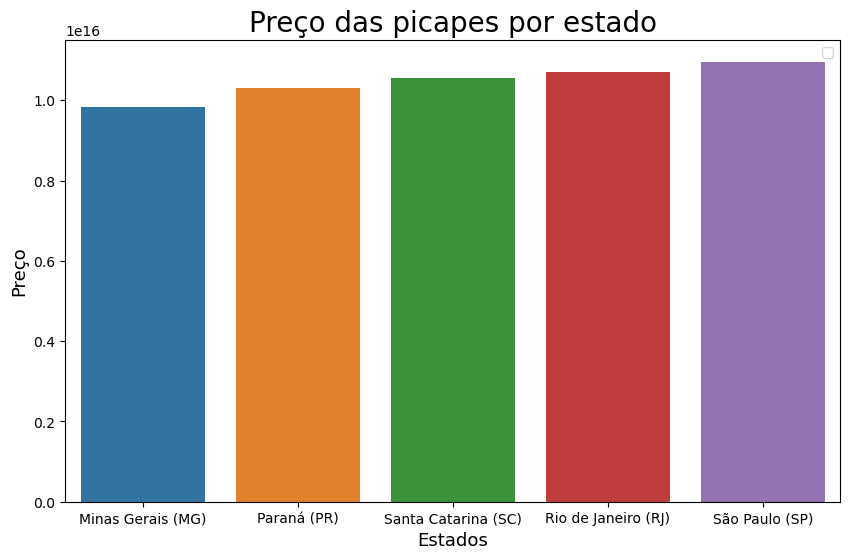

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=picape_automatica_,x='estado_vendedor',y='preco')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço das picapes por estado', fontsize=20)
plt.legend(fontsize=10)
plt.show()

In [28]:
train.dono_aceita_troca.value_counts()

Aceita troca    21922
Name: dono_aceita_troca, dtype: int64

In [29]:
train.dono_aceita_troca = train.dono_aceita_troca.replace('Aceita troca',1)
train.dono_aceita_troca = train.dono_aceita_troca.fillna(0)

In [30]:
train.ipva_pago.value_counts()

IPVA pago    19659
Name: ipva_pago, dtype: int64

In [31]:
train.ipva_pago = train.ipva_pago.replace('IPVA pago',1)
train.ipva_pago = train.ipva_pago.fillna(0)

In [32]:
picape_minas = train[(train.estado_vendedor=='Minas Gerais (MG)')&(train.tipo=='Picape')&(train.cambio=='Automática')]
picape_minas[['estado_vendedor','ipva_pago','dono_aceita_troca']].groupby('estado_vendedor').mean()

,ipva_pago,dono_aceita_troca
estado_vendedor,,
Minas Gerais (MG),0.611374,0.777251


## Dentre os estados com maior quantidade de picapes automáticas, entendemos que o comprador também quer pagar o menor preço possível, visto isso, identificamos Minas Gerais como o melhor estado para comprar uma picape automática, e reafirmamos os dados apontando que 61% das picapes estão com ipva pago e 77% dos donos aceitam troca, o que ajudaria na negociação

## **

# Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [33]:
garantia_de_fabrica = train

In [34]:
garantia_estado = garantia_de_fabrica[['estado_vendedor','garantia_de_fábrica','preco','revisoes_dentro_agenda']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()
garantia_estado

,estado_vendedor,garantia_de_fábrica,preco
0,São Paulo (SP),2307.0,1.640546e+20
1,Rio de Janeiro (RJ),412.0,2.503207e+19
2,Paraná (PR),389.0,2.624164e+19
3,Santa Catarina (SC),330.0,2.287032e+19
4,Rio Grande do Sul (RS),281.0,1.714449e+19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


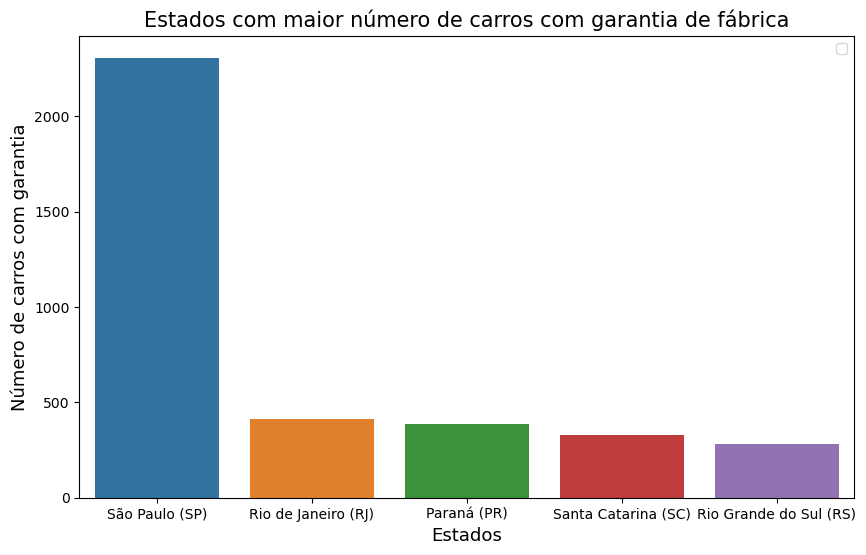

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=garantia_estado,x='estado_vendedor',y='garantia_de_fábrica')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Número de carros com garantia', fontsize=13)
plt.title('Estados com maior número de carros com garantia de fábrica', fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [36]:
train.revisoes_dentro_agenda.value_counts().index[0]

'Todas as revisões feitas pela agenda do carro'

In [37]:
train.revisoes_dentro_agenda = train.revisoes_dentro_agenda.replace(train.revisoes_dentro_agenda.value_counts().index[0],1)
train.revisoes_dentro_agenda = train.revisoes_dentro_agenda.fillna(0)

In [38]:
train.revisoes_dentro_agenda.value_counts()

0.0    23674
1.0     5910
Name: revisoes_dentro_agenda, dtype: int64

In [39]:
train[(train.garantia_de_fábrica==1)&(train.revisoes_dentro_agenda==1)][['estado_vendedor','garantia_de_fábrica','revisoes_dentro_agenda','preco']].groupby('estado_vendedor').count().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,São Paulo (SP),1292,1292,1292
1,Paraná (PR),201,201,201
2,Rio de Janeiro (RJ),198,198,198
3,Santa Catarina (SC),191,191,191
4,Rio Grande do Sul (RS),160,160,160


In [40]:
lista = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Rio Grande do Sul (RS)']
garantia_revisao = listaFiltro(train,'estado_vendedor' ,lista)

In [41]:
estado_preco = garantia_revisao[(garantia_revisao.garantia_de_fábrica==1)&(garantia_revisao.revisoes_dentro_agenda==1)][['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False).reset_index()
estado_preco

,estado_vendedor,preco
0,Santa Catarina (SC),1.136324e+16
1,Rio Grande do Sul (RS),1.100160e+16
2,Paraná (PR),1.093814e+16
3,Rio de Janeiro (RJ),1.072757e+16
4,São Paulo (SP),9.900599e+15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


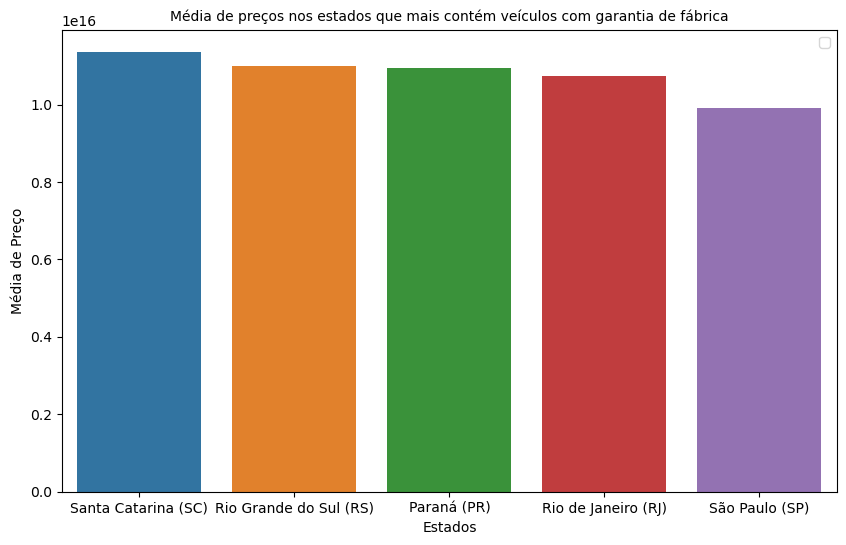

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=estado_preco,x='estado_vendedor',y='preco')
plt.xlabel('Estados', fontsize=10)
plt.ylabel('Média de Preço', fontsize=10)
plt.title('Média de preços nos estados que mais contém veículos com garantia de fábrica', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## Levando em conta que ao comprar um carro querendo garantia de fábrica as revisões precisam estar em dia, visto isso selecionamos os 5 estados que mais atendem esse requisito, dando destaque para SP, que contém muito mais carros nesse aspecto que os demais, mais do que 6x a quantia dos demais, sendo assim ao observar a média de preços e constar que o comprador quer optar pelo menor preço nessas condições já atendidas definimos SP como nosso ganhador

## Agora iremos tratar os dados na base de treino para fazer a previsão dos preços

In [43]:
train_ = train.drop(['modelo','versao','cidade_vendedor'],axis=1)

In [44]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca_popular            29584 non-null  object 
 3   ano_de_fabricacao        29584 non-null  int64  
 4   ano_modelo               29584 non-null  float64
 5   hodometro                29584 non-null  float64
 6   cambio                   29584 non-null  object 
 7   num_portas               29584 non-null  int64  
 8   tipo                     29584 non-null  object 
 9   blindado                 29584 non-null  object 
 10  cor                      29584 non-null  object 
 11  tipo_vendedor            29584 non-null  object 
 12  estado_vendedor          29584 non-null  object 
 13  anunciante               29584 non-null  object 
 14  entrega_delivery      

In [45]:
train_ = train_.drop('veiculo_alienado',axis=1)

In [46]:
train_.blindado.value_counts()

N    29336
S      248
Name: blindado, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


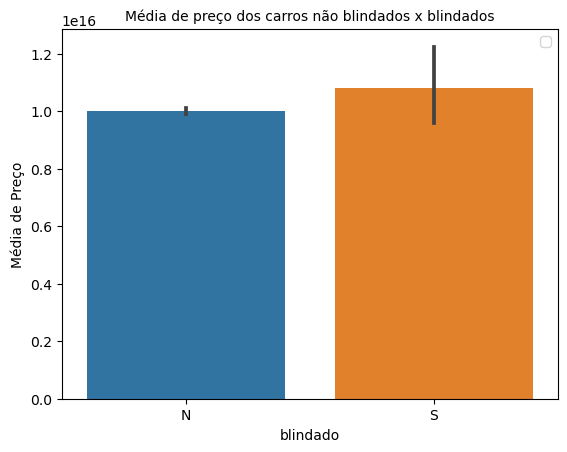

In [47]:
sns.barplot(data=train_,x='blindado',y='preco')
plt.xlabel('blindado', fontsize=10)
plt.ylabel('Média de Preço', fontsize=10)
plt.title('Média de preço dos carros não blindados x blindados', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [48]:
train.blindado = train.blindado.replace('N',0)
train.blindado = train.blindado.replace('S',1)
train.blindado.value_counts()

0    29336
1      248
Name: blindado, dtype: int64

In [49]:
train_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,1.032383e+01,3.487334e+00,8.000000e+00,8.000000e+00,8.000000e+00,1.400000e+01,2.100000e+01
ano_de_fabricacao,29584.0,2.016759e+03,4.062422e+00,1.985000e+03,2.015000e+03,2.018000e+03,2.019000e+03,2.022000e+03
ano_modelo,29584.0,2.017809e+03,2.673930e+00,1.997000e+03,2.016000e+03,2.018000e+03,2.020000e+03,2.023000e+03
hodometro,29584.0,5.843059e+04,3.256177e+04,1.000000e+02,3.121400e+04,5.743400e+04,8.195350e+04,3.900650e+05
num_portas,29584.0,3.940677e+00,3.383603e-01,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
dono_aceita_troca,29584.0,7.410087e-01,4.380883e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
ipva_pago,29584.0,6.645146e-01,4.721679e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
garantia_de_fábrica,29584.0,1.475460e-01,3.546553e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
revisoes_dentro_agenda,29584.0,1.997701e-01,3.998343e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
preco,29584.0,1.002299e+16,9.547504e+15,2.006292e+10,3.196583e+15,8.244891e+15,1.342533e+16,6.549912e+16


In [50]:
train_.veiculo_único_dono.value_counts()

Único dono    10423
Name: veiculo_único_dono, dtype: int64

In [51]:
train_.veiculo_único_dono = train_.veiculo_único_dono.replace(train.veiculo_único_dono.value_counts().index[0],1)
train_.veiculo_único_dono = train_.veiculo_único_dono.fillna(0)

In [52]:
train_.veiculo_único_dono.value_counts().sum()

29584

In [53]:
train_.marca_popular = train_.marca_popular.astype(int)

In [54]:
train_.blindado.value_counts()

N    29336
S      248
Name: blindado, dtype: int64

In [55]:
train_.blindado = train_.blindado.replace('N',0)
train_.blindado = train_.blindado.replace('S',1)
train_.blindado.value_counts()

0    29336
1      248
Name: blindado, dtype: int64

In [56]:
train_.revisoes_concessionaria.value_counts()

Todas as revisões feitas pela concessionária    9172
Name: revisoes_concessionaria, dtype: int64

In [57]:
train_.revisoes_concessionaria = train_.revisoes_concessionaria.replace('Todas as revisões feitas pela concessionária',1)
train_.revisoes_concessionaria = train_.revisoes_concessionaria.fillna(0)
train_.revisoes_concessionaria.value_counts()

0.0    20412
1.0     9172
Name: revisoes_concessionaria, dtype: int64

In [58]:
train_.veiculo_licenciado.value_counts()

Licenciado    15906
Name: veiculo_licenciado, dtype: int64

In [59]:
train_.veiculo_licenciado = train_.veiculo_licenciado.replace('Licenciado',1)
train_.veiculo_licenciado = train_.veiculo_licenciado.fillna(0)
train_.veiculo_licenciado.value_counts()

1.0    15906
0.0    13678
Name: veiculo_licenciado, dtype: int64

In [60]:
train_.num_fotos = train_.num_fotos.fillna(train_.num_fotos.value_counts().index[0])

In [61]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca_popular            29584 non-null  int32  
 3   ano_de_fabricacao        29584 non-null  int64  
 4   ano_modelo               29584 non-null  float64
 5   hodometro                29584 non-null  float64
 6   cambio                   29584 non-null  object 
 7   num_portas               29584 non-null  int64  
 8   tipo                     29584 non-null  object 
 9   blindado                 29584 non-null  int64  
 10  cor                      29584 non-null  object 
 11  tipo_vendedor            29584 non-null  object 
 12  estado_vendedor          29584 non-null  object 
 13  anunciante               29584 non-null  object 
 14  entrega_delivery      

In [62]:
train_.entrega_delivery=train_.entrega_delivery.astype(int)

In [63]:
train_.troca = train_.troca.astype(int)

In [64]:
train_.elegivel_revisao = train_.elegivel_revisao.astype(int)

In [65]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca_popular            29584 non-null  int32  
 3   ano_de_fabricacao        29584 non-null  int64  
 4   ano_modelo               29584 non-null  float64
 5   hodometro                29584 non-null  float64
 6   cambio                   29584 non-null  object 
 7   num_portas               29584 non-null  int64  
 8   tipo                     29584 non-null  object 
 9   blindado                 29584 non-null  int64  
 10  cor                      29584 non-null  object 
 11  tipo_vendedor            29584 non-null  object 
 12  estado_vendedor          29584 non-null  object 
 13  anunciante               29584 non-null  object 
 14  entrega_delivery      

In [66]:
reg = smf.ols('preco ~ marca_popular+tipo+hodometro+veiculo_único_dono',train_).fit()

In [67]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     20.07
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           4.74e-34
Time:                        19:51:37   Log-Likelihood:            -1.1304e+06
No. Observations:               29584   AIC:                         2.261e+06
Df Residuals:                   29574   BIC:                         2.261e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     6.446e+15   1.87e+15      3.451      0.001    2.78e+15    1.01e+16
tipo[T.Hatchback]             4.799e+15   1.88e+15      2.558      0.011    1.12e+15    8.48e+15
tipo[T.Minivan]               9.972e+14   4.06e+15      0.246      0.806   -6.95e+15    8.95e+15
tipo[T.Perua/SW]              6.351e+15   2.62e+15      2.423      0.015    1.21e+15    1.15e+16
tipo[T.Picape]                5.394e+15   1.88e+15      2.876      0.004    1.72e+15    9.07e+15
tipo[T.Sedã]                  4.273e+15   1.87e+15      2.284      0.022    6.06e+14    7.94e+15
tipo[T.Utilitário esportivo]  5.703e+15   1.88e+15      3.041      0.002    2.03e+15    9.38e+15
marca_popular                  -7.6e+14   1.26e+14     -6.037      0.000   -1.01e+15   -5.13e+14
hodometro                    -9.222e+09   1.92e+09     -4.810      0.000    -1.3e+10   -5.46e+09
veiculo_único_dono           -2.756e+14    1.3e+14     -2.123      0.034    -5.3e+14   -2.11e+13
==============================================================================
Omnibus:                    15732.444   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131756.828
Skew:                           2.445   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                     6.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Selecionamos todas as variáveis para treinar o modelo e observamos o reg.summary() , fomos retirando as variáveis x do nosso modelo observando o valor de P , que significa a probabilidade de que a relação entre as variáveis observadas seja ao acaso, adotamos o valor de p ≤ 0,05 ou seja, menor ou igual a 5%, e após filtrar ainda fomos adicionando novamente as variáveis para ver como o valor de P se comportava e chegamos a essa regressão final

## vamos ver como as colunas escolhidas se comportam 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


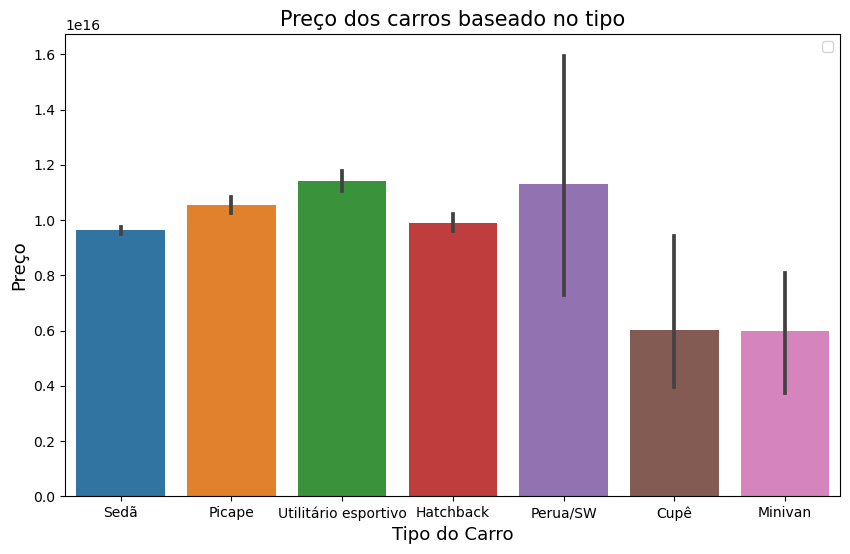

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_,x='tipo',y='preco')
plt.xlabel('Tipo do Carro', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço dos carros baseado no tipo', fontsize=15)
plt.legend(fontsize=10)
plt.show()

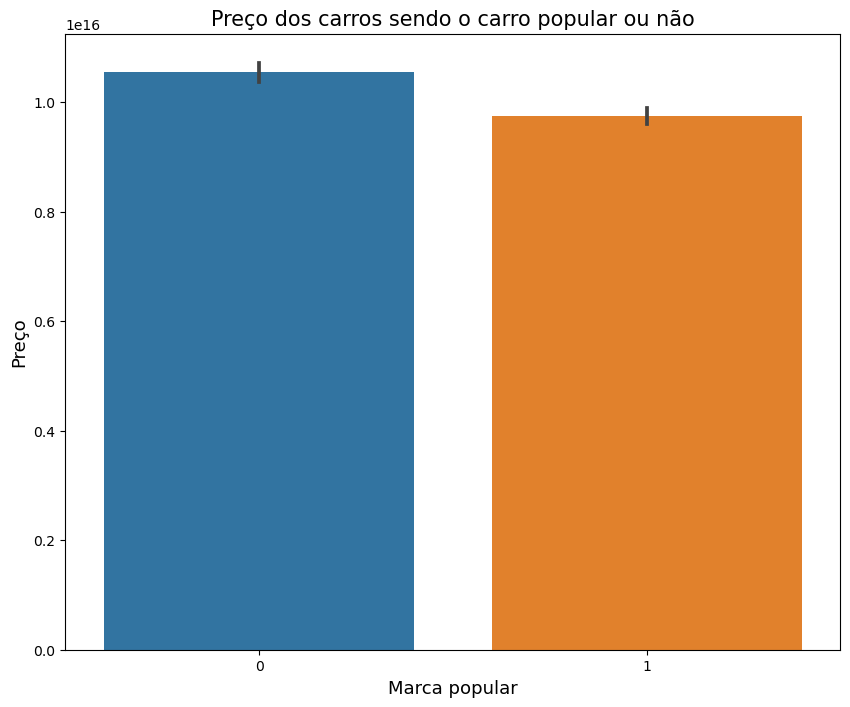

In [69]:
plt.figure(figsize=(10, 8))
sns.barplot(data=train_,x='marca_popular',y='preco')
plt.xlabel('Marca popular', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço dos carros sendo o carro popular ou não', fontsize=15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


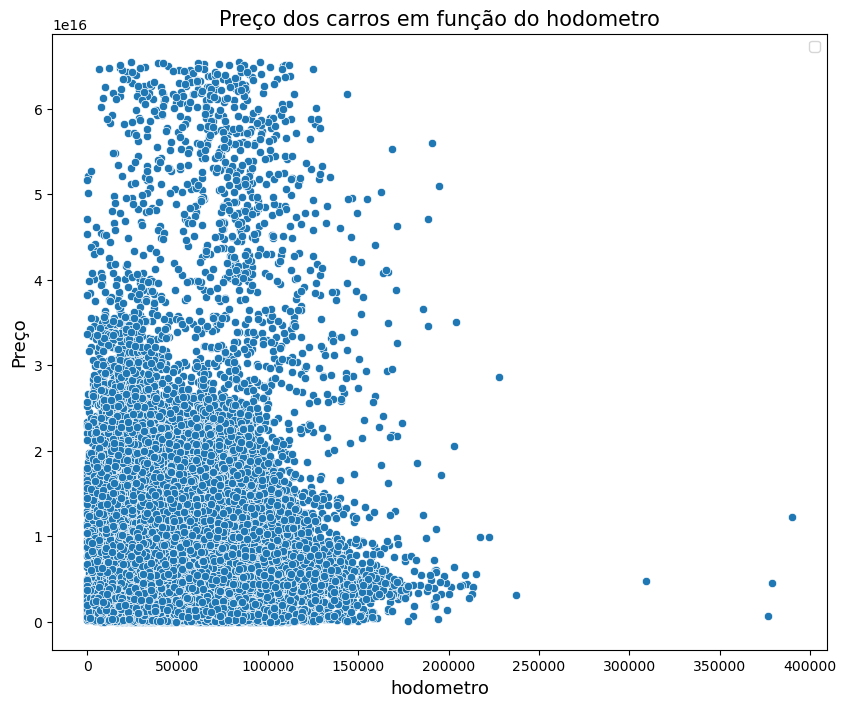

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_,x='hodometro',y='preco')
plt.xlabel('hodometro', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço dos carros em função do hodometro', fontsize=15)
plt.legend(fontsize=10)
plt.show()

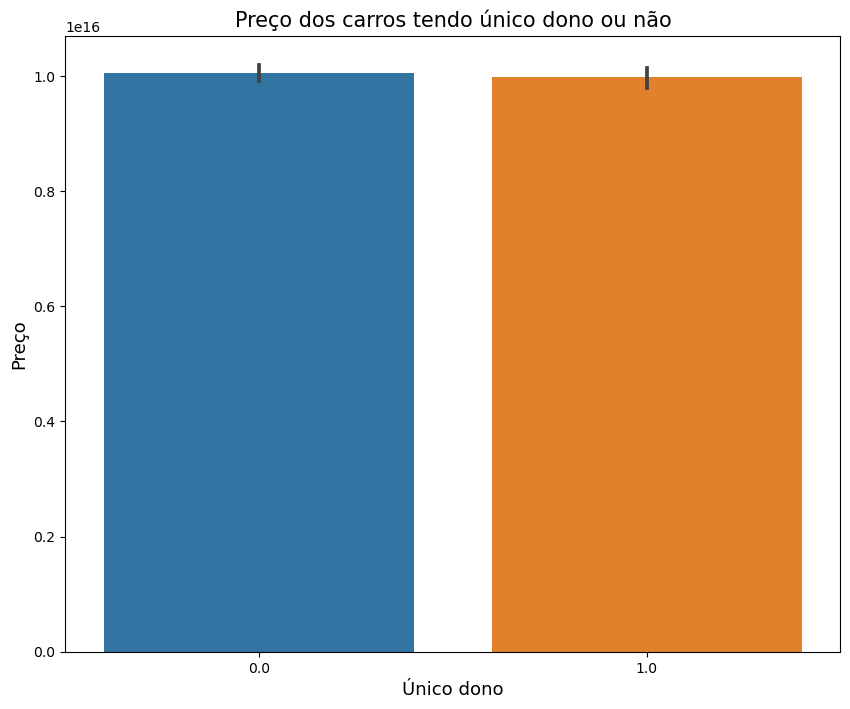

In [71]:
plt.figure(figsize=(10, 8))
sns.barplot(data=train_,x='veiculo_único_dono',y='preco')
plt.xlabel('Único dono', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço dos carros tendo único dono ou não', fontsize=15)
plt.show()

<AxesSubplot:>

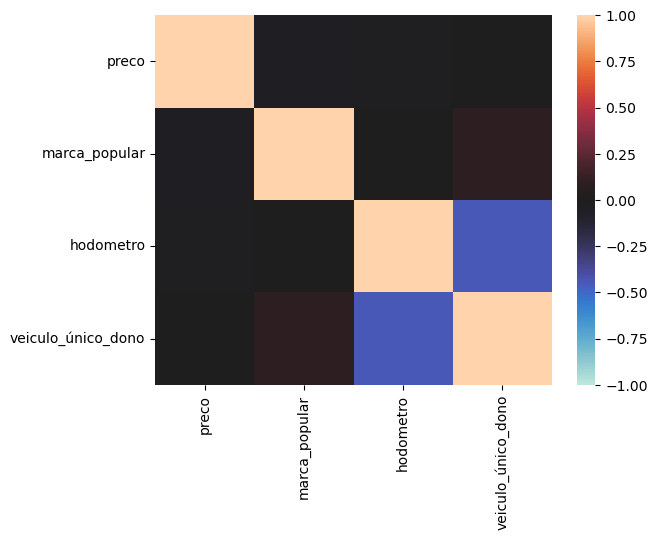

In [72]:
sns.heatmap(train_[['preco','marca_popular','tipo','hodometro','veiculo_único_dono']].corr(),center=0,vmin=-1,vmax=1)

In [73]:
train_['predito'] = reg.fittedvalues

In [74]:
train_['resid'] = reg.resid

## Como os preços são valores muito altos, acaba inviabilizando analisar o r² e o resíduo

## Agora vamos transformar os dados na base de test para realizar as predições finais

In [75]:
test_ = test[['marca','hodometro','veiculo_único_dono']].copy()

In [76]:
test_

,marca,hodometro,veiculo_único_dono
0,NISSAN,20258.0,NaN
1,FIAT,53045.0,Único dono
2,AUDI,32486.0,NaN
3,CHEVROLET,24937.0,Único dono
4,FORD,62074.0,NaN
...,...,...,...
9857,TOYOTA,44943.0,NaN
9858,TOYOTA,44316.0,NaN
9859,CHEVROLET,21587.0,Único dono
9860,PEUGEOT,54084.0,Único dono


In [77]:
test_.veiculo_único_dono.value_counts()

Único dono    3475
Name: veiculo_único_dono, dtype: int64

In [78]:
test_['veiculo_único_dono'] = test_['veiculo_único_dono'].replace('Único dono',1)
test_['veiculo_único_dono'] = test_['veiculo_único_dono'].fillna(0)
test_.veiculo_único_dono.value_counts()

0.0    6387
1.0    3475
Name: veiculo_único_dono, dtype: int64

In [79]:
marca_popular = ['VOLKSWAGEN','CHEVROLET','TOYOTA','HYUNDAI','FIAT','PEUGEOT','HONDA','FORD','RENAULT','NISSAN','CITROEN']

In [80]:
for i in range(0,11):
    marca = marca_popular[i]
    test_mask = test.marca==marca
    test_['marca'][test_mask] = 1

C:\Users\felip\AppData\Local\Temp\ipykernel_5016\1990965571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['marca'][test_mask] = 1


In [84]:
test_.marca.value_counts()

1                6335
JEEP              667
AUDI              593
BMW               591
MERCEDES-BENZ     376
MITSUBISHI        286
LAND ROVER        267
KIA               157
PORSCHE           121
VOLVO              76
JAGUAR             64
CITROËN            54
RAM                53
CHERY              49
TROLLER            46
MINI               45
LEXUS              16
SUBARU             13
SUZUKI             10
CHRYSLER           10
DODGE              10
SSANGYONG           6
MASERATI            5
SMART               4
JAC                 2
LIFAN               2
FERRARI             1
EFFA                1
ALFA ROMEO          1
LAMBORGHINI         1
Name: marca, dtype: int64

In [92]:
marca_nao_popular = test_.marca.value_counts().index[1:]
for i in range(0,29):
    marca = marca_nao_popular[i]
    test_mask = test.marca==marca
    test_['marca'][test_mask] = 0

C:\Users\felip\AppData\Local\Temp\ipykernel_5016\3521576874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_['marca'][test_mask] = 0


In [93]:
test_.rename({"marca": "marca_popular"}, axis=1, inplace=True)

In [94]:
test_.marca_popular.value_counts()

1    6335
0    3527
Name: marca_popular, dtype: int64

In [96]:
reg2= reg.predict(train_)

In [101]:
train['preco'] = reg2

In [103]:
df_final = train[['id','preco']]

In [105]:
df_final.to_csv('predicted.csv',index=False)

In [106]:
testando = pd.read_csv('predicted.csv')